In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
balance = pd.read_csv('datasets/final_events/final_balance.csv')
check = pd.read_csv('datasets/final_events/final_check.csv')
save_invoice = pd.read_csv('datasets/final_events/final_sinvoice.csv')
sync = pd.read_csv('datasets/final_events/final_sync.csv')
z_list = pd.read_csv('datasets/final_events/final_zlist.csv')
data_query = pd.read_csv('datasets/final_events/final_dquery.csv')


In [424]:
check = check.drop('Unnamed: 0', 1)
balance = balance.drop('Unnamed: 0', 1)
save_invoice = save_invoice.drop('Unnamed: 0', 1)
sync = sync.drop('Unnamed: 0', 1)
z_list = z_list.drop('Unnamed: 0', 1)
data_query = data_query.drop('Unnamed: 0', 1)



In [425]:
from sklearn import preprocessing

def normalize_data(df):
    df = df.clip(lower=0)
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    cols = df.columns
    np_scaled = min_max_scaler.fit_transform(df)
    df = pd.DataFrame(np_scaled, columns=cols)
    return df



In [426]:
norm_sync = normalize_data(sync)
norm_check = normalize_data(check)
norm_sinvoice = normalize_data(save_invoice)
norm_balance = normalize_data(balance)
norm_zlist = normalize_data(z_list)
norm_dquery = normalize_data(data_query)

In [416]:
test_data = pd.concat([norm_balance, norm_check, norm_dquery, norm_sinvoice, norm_sync, norm_zlist], axis=1)

In [417]:
def get_decay(window_size, smoothing=.3):
    e = np.exp(np.arange(window_size) / int(window_size * smoothing))[::-1] - 1
    e = (e - np.min(e)) / (np.max(e) - np.min(e))
    return e

In [348]:
def corr_results(data, time_window):
    data = np.array(data)
    plt.scatter(data[:, 0], data[:, 1])
    corr = (data[:,1].sum()/data.shape[0])/time_window
    return corr
    
    

In [329]:
def detect_spike_sync(ts1, ts2, window_size=5):
    con1 = ts1[ts1.columns[0]]>0
    ts1_signals = ts1[con1]
    print(len(ts1_signals))
    print(ts1.columns[0])

    result = list()
    for indx in ts1_signals.index:
        
        if indx+window_size > len(ts2):
            break
        val1 = ts1_signals.loc[indx].values[0]
        val2 = ts2.loc[indx:indx+window_size-1, ts2.columns[0]].values #* get_decay(window_size)

        result.append([val1, sum(val2)])
        
    return result
        
        

In [418]:
time_window = 5

balance_sinvoice = detect_spike_sync(norm_sinvoice,norm_balance, time_window)
check_sync = detect_spike_sync(norm_check, norm_sync, time_window)


533
save_invoice
816
check


In [449]:
col_names=['z_list', 'save_invoice', 'check', 'balance', 'data_query', 'sync']


def calc_matrix(all_ts, window_size):

    matrix = np.zeros((len(all_ts), len(all_ts)))

    for i, ts1 in enumerate(all_ts):

        for j, ts2 in enumerate(all_ts):

             res = detect_spike_sync(ts1, ts2, window_size)
             matrix[i][j] = corr_results(res, window_size)
            
    return matrix


def calc_inv_matrix(all_ts, window_size):
    inv_matrix = np.zeros((len(all_ts), len(all_ts)))
    
    for i, ts2 in enumerate(all_ts):
        for j, ts1 in enumerate(all_ts):
            
            if i == j:
                inv_matrix[i][j] = 1
            else:
                res = detect_spike_sync(ts2, ts1, window_size)
                
                inv_matrix[i][j] = corr_results(res, window_size)
                
    return inv_matrix
    

188
balance
188
balance
188
balance
188
balance
188
balance
188
balance
816
check
816
check
816
check
816
check
816
check
816
check
543
data_query
543
data_query
543
data_query
543
data_query
543
data_query
543
data_query
533
save_invoice
533
save_invoice
533
save_invoice
533
save_invoice
533
save_invoice
533
save_invoice
947
sync
947
sync
947
sync
947
sync
947
sync
947
sync
1342
z_list
1342
z_list
1342
z_list
1342
z_list
1342
z_list
1342
z_list


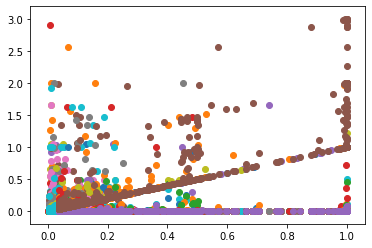

In [450]:
result2 = calc_matrix([norm_balance, norm_check, norm_dquery, norm_sinvoice, norm_sync, norm_zlist], window_size=4)

In [451]:
result3 = pd.DataFrame(result2)


In [452]:
result3

,0,1,2,3,4,5
0,0.053906,0.000816,0.000805,0.005503,0.000835,0.011672
1,0.001015,0.027837,0.006520,0.003100,0.001127,0.007419
2,0.001983,0.002087,0.023623,0.005603,0.002046,0.007638
3,0.001685,0.003471,0.000936,0.062899,0.001869,0.005490
4,0.001061,0.002732,0.004775,0.005698,0.011287,0.005326
5,0.000690,0.000978,0.000782,0.001433,0.000590,0.083756


In [79]:
rez = pd.DataFrame(rez)